<h1>유전 알고리즘의 2번 문제</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Maximum value: 38.81841302039342 at x1 = 11.631431431431432, x2 = 5.725125125125125


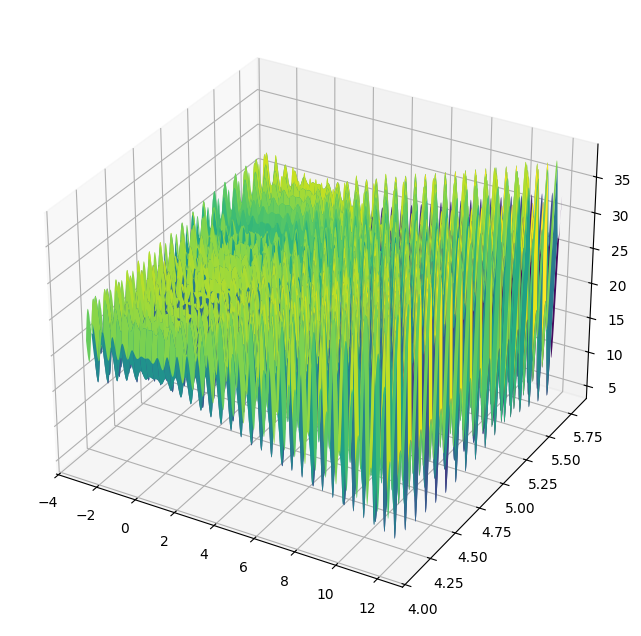

In [55]:
def my_fun(x1, x2):

    f = my_func_x1(x1) + my_func_x2(x2)
    
    return f


def my_func_x1 (x1):
    return 21.5 + x1 * np.sin(4 * np.pi * x1)

def my_func_x2 (x2):
    return x2 * np.sin(20 * np.pi * x2)


x1 = np.linspace(-3, 12.1, 1000)
x2 = np.linspace(4.1, 5.8, 1000)

# Plot the function in 3D
X1, X2 = np.meshgrid(x1, x2)
Z = my_fun(X1, X2)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', edgecolor='none')

# 최대값 구하기
max_value = np.max(Z)
max_index = np.unravel_index(np.argmax(Z, axis=None), Z.shape)

print(f"Maximum value: {max_value} at x1 = {X1[max_index]}, x2 = {X2[max_index]}")


(a) 정밀도를 0.0001로 놓았을 때, x1과 x2의 유전자 길이를 구하여라

In [56]:
# x1 정의역의 크기
x1_size = 15.1
# x2 정의역의 크기
x2_size = 1.7

print("Size of x1 domain:", x1_size)
print("Size of x2 domain:", x2_size)


x_1_num = x1_size * 10**4
x_2_num = x2_size * 10**4

print(x_1_num)
print(x_2_num)

print(2**14, "< x1 <", 2**15)
print(2**17,"< x2 <", 2**18)

print("즉 x1의 유전자 길이는 15bit, x2의 유전자 길이는 18bit입니다.")



Size of x1 domain: 15.1
Size of x2 domain: 1.7
151000.0
17000.0
16384 < x1 < 32768
131072 < x2 < 262144
즉 x1의 유전자 길이는 15bit, x2의 유전자 길이는 18bit입니다.


(b) 유전자 v = (x1 concat x2) = (010001001011010000111110010100010) 에 대해 x1과 x2의 값을 각각 구하고 범위 내의 유효한 값인지 확인하라.

In [80]:
def decoding_x1(x1):
    

    dec_x1 =  -3 + (int(x1, 2) / (2**15 - 1)) * 15.1
    return dec_x1

def decoding_x2(x2):
    dec_x2 = 4.1 + (int(x2, 2) / (2**18 - 1)) * 1.7
    return dec_x2

In [81]:
# 유전자 v = (x1 concat x2) = (010001001011010000111110010100010) 에 대해 x1과 x2의 값을 각각 구하고 범위 내의 유효한 값인지 확인하라.

v = '010001001011010000111110010100010'
x1_bin = v[:15]  # x1의 유전자 부분
x2_bin = v[15:]  # x2의 유전자 부분

print("x1 binary:", x1_bin)
print("x2 binary:", x2_bin)

# 2진수를 10진수로 변환
x1_dec = int(x1_bin, 2)
x2_dec = int(x2_bin, 2)

# 범위 내의 유효한 값인지 확인
x1_value = decoding_x1(x1_bin)
x2_value = decoding_x2(x2_bin)
print("x1 value:", x1_value)
print("x2 value:", x2_value)

print("x1과 x2가 모두 범위 내에 존재한다.")




x1 binary: 010001001011010
x2 binary: 000111110010100010
x1 value: 1.0525345622119815
x2 value: 4.306910731928756
x1과 x2가 모두 범위 내에 존재한다.


Problem (c)

In [82]:
def crossover_x1(gene1, gene2):
    # Perform crossover at a random point
    crossover_point = np.random.randint(1, 14)  # Random point between 1 and 21
    new_gene1 = gene1[:crossover_point] + gene2[crossover_point:]
    new_gene2 = gene2[:crossover_point] + gene1[crossover_point:]

    return new_gene1, new_gene2


def crossover_x2(gene1, gene2):
    # Perform crossover at a random point
    crossover_point = np.random.randint(1, 17)  # Random point between 1 and 17
    new_gene1 = gene1[:crossover_point] + gene2[crossover_point:]
    new_gene2 = gene2[:crossover_point] + gene1[crossover_point:]

    return new_gene1, new_gene2

In [83]:
def mutation_1(gene):

    # Perform mutation by flipping a random bit
    mutation_point = np.random.randint(0, 15)  # Random point between 0 and 21
    new_gene = list(gene)
    new_gene[mutation_point] = '1' if new_gene[mutation_point] == '0' else '0'
    
    new_gene = ''.join(new_gene)

    return new_gene



def mutation_2(gene):
    # Perform mutation by flipping a random bit
    mutation_point = np.random.randint(0, 18)  # Random point between 0 and 17
    new_gene = list(gene)
    new_gene[mutation_point] = '1' if new_gene[mutation_point] == '0' else '0'
    
    new_gene = ''.join(new_gene)

    return new_gene

In [84]:
def fitness_x1(x1):

    fitness_value_x1 = my_func_x1(decoding_x1(x1))
    return fitness_value_x1

def fitness_x2(x2):
    fitness_value_x2 = my_func_x2(decoding_x2(x2))
    return fitness_value_x2



def selection_roulette_wheel(v):
    fitness_values = [fitness_x1(v[i][:15]) + fitness_x2(v[i][15:]) for i in range(len(v))]
    total_fitness = sum(fitness_values)
    probabilities = [f / total_fitness for f in fitness_values]
    selected_index = np.random.choice(range(len(v)), p=probabilities)
    new_individual = v[selected_index]
    return new_individual  # 리스트 변환하지 않고 문자열로 반환


8) 개체군(population)의 크기 pop_size = 20, 교차(crossover) 확률 pc = 0.25, 돌연변이(mutation) 확률 pm = 0.01)로 유전 알고리즘을 구현하여, 주어진 목적함수의 최대값과 해당하는 유전자를 구하세요 (각 세대 별 결과를 모니터링 할 수 있게 구현할 것)

In [89]:
## 2- c problem

pop_size = 20
pc = 0.25 # crossover probability
pm = 0.01  # mutation probability

x1 = np.linspace(-3, 12.1, 1000)
x2 = np.linspace(4.1, 5.8, 1000)


# 최대값 구하기
X1, X2 = np.meshgrid(x1, x2)
Z = my_fun(X1, X2)
max_value = np.max(Z)
max_index = np.unravel_index(np.argmax(Z, axis=None), Z.shape)



generations = 1000


# Define genetic algorithm with monitoring
def genetic_algorithm(pop_size, generations, pc, pm):
    # Initialize population
    population = [format(np.random.randint(0, 2**15), '015b') + format(np.random.randint(0, 2**18), '018b') for _ in range(pop_size)]
    print("Initial population:", population)
    best_fitness = []
    
    for generation in range(generations):
        new_population = []
        
        for i in range(pop_size // 2):
            # Selection
            parent1 = selection_roulette_wheel(population)
            parent2 = selection_roulette_wheel(population)

            # Crossover
            if np.random.rand() < pc:
                child1_x1, child2_x1 = crossover_x1(parent1[:15], parent2[:15])
                child1_x2, child2_x2 = crossover_x2(parent1[15:], parent2[15:])
                child1 = child1_x1 + child1_x2
                child2 = child2_x1 + child2_x2
            else:
                child1 = parent1
                child2 = parent2
            
            # Mutation
            if np.random.rand() < pm:
                child1 = mutation_1(child1)
            if np.random.rand() < pm:
                child2 = mutation_2(child2)

            new_population.append(child1)
            new_population.append(child2)

        population = new_population
        
        # Calculate fitness for the current generation
        fitness_values = [my_fun(decoding_x1(ind[:15]), decoding_x2(ind[15:])) for ind in population]
        best_fitness_value = max(fitness_values)
        best_index = fitness_values.index(best_fitness_value)
        best_gene = population[best_index]
        
        best_fitness.append(best_fitness_value)

        # 모니터링 출력
        print(f"Generation {generation+1}: Best Fitness = {best_fitness_value:.4f}, Best Gene = {best_gene}")
        
    return population, best_fitness

# Run the genetic algorithm
population, best_fitness = genetic_algorithm(pop_size, generations, pc, pm)

# best fitness to decimal
best_fitness_decimal = [my_fun(decoding_x1(ind[:15]), decoding_x2(ind[15:])) for ind in population]

print("Best fitness values over generations:", best_fitness)

Initial population: ['111001011011101111110111010001010', '100100100111110000001110110010100', '110011011000101100101010101100101', '110100011110000011011010011000010', '111100101000010001100010010001100', '010000111000011110101111011101010', '101101100110000110110110111011100', '111111000111101000000010110000111', '101011001111111001011110100101010', '101110000101011110101011111101000', '101101011010111011100101100010110', '111001000010001010001101000011110', '111010001100010101111001001000011', '011010000000011101101000111000101', '100001101111010000000101001101101', '010000110010111100001000100000110', '110010101101101111011101110000100', '110010011101011000011001011110000', '010001001111000000001110001110111', '001001110000110011100011010100110']
Generation 1: Best Fitness = 28.8338, Best Gene = 101011001111111001011110100101010
Generation 2: Best Fitness = 33.1465, Best Gene = 111010000000011000001000111000101
Generation 3: Best Fitness = 28.8338, Best Gene = 101011001111111001011